# Дискретное преобразование Фурье

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sin, cos
%matplotlib inline

Реализуем прямое преобразование Фурье за $O(n \cdot \log{n})$

In [2]:
def angle(k , n):
    return complex(cos(2 * pi * k / n), sin(2 * pi * k / n))

def fft(coeffs):
    if (len(coeffs) == 1):
        return coeffs
    else:
        n = len(coeffs)
        # Рекурсивно уменьшаем длину массива, пока она не станет равной 1
        even_powers = fft(coeffs[::2])
        odd_powers = fft(coeffs[1::2])
        new_coeffs = [even_powers[k] + odd_powers[k] * angle(k, n) for k in range (n // 2)]
        new_coeffs.extend([even_powers[k] - odd_powers[k] * angle(k, n) for k in range (n // 2)])
        return new_coeffs

Реализуем обратное преобразование Фурье за $O(n \cdot \log{n})$

In [3]:
def ifft (coeffs):
    if (len(coeffs) == 1):
        return coeffs
    else:
        n = len(coeffs)
        even_powers = ifft(coeffs[0::2])
        odd_powers = ifft(coeffs[1::2])
        new_coeffs = [(even_powers[k] + odd_powers[k] * angle(-k, n)) / 2 for k in range (n // 2)]
        new_coeffs.extend([(even_powers[k] - odd_powers[k] * angle(-k, n)) / 2 for k in range (n // 2)])
        return new_coeffs

 Построим графики для функций:

/Users/artemyamalutdinov/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


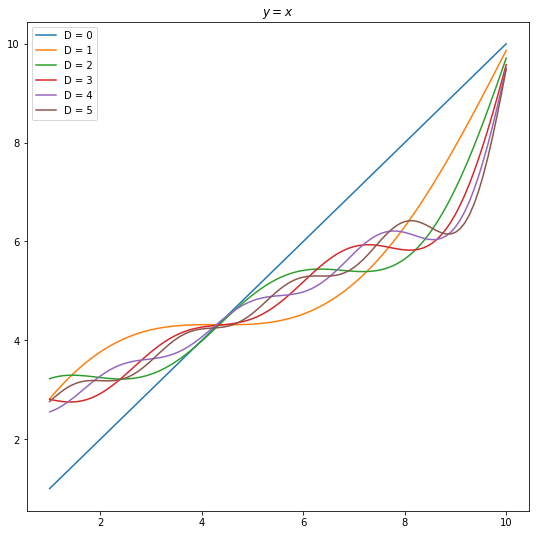

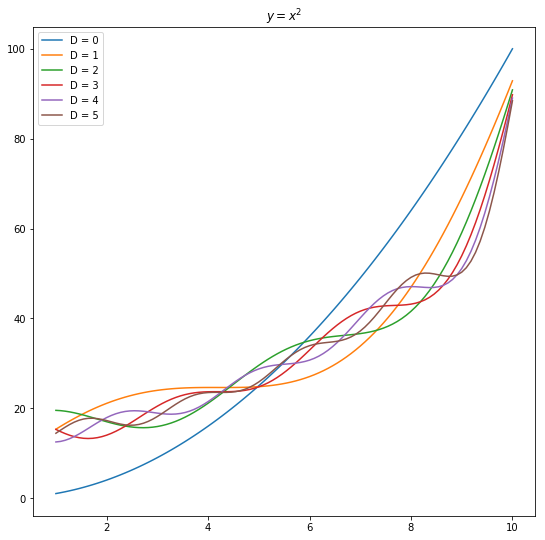

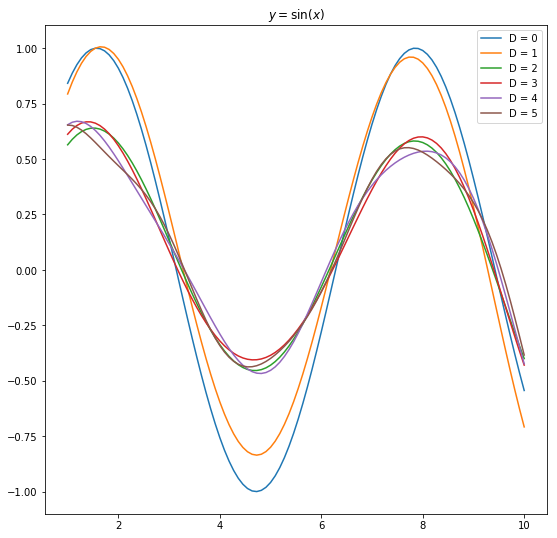

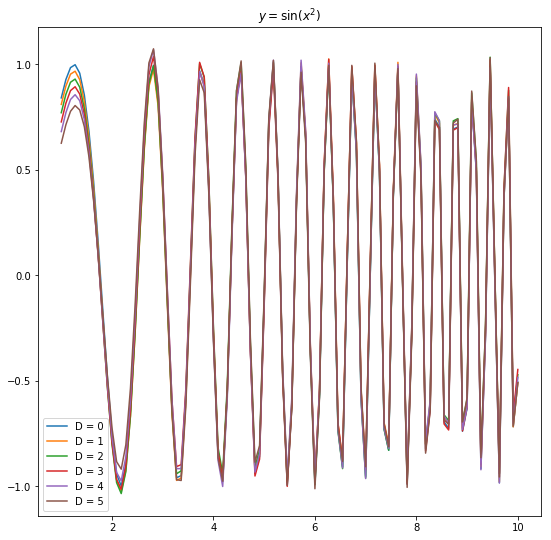

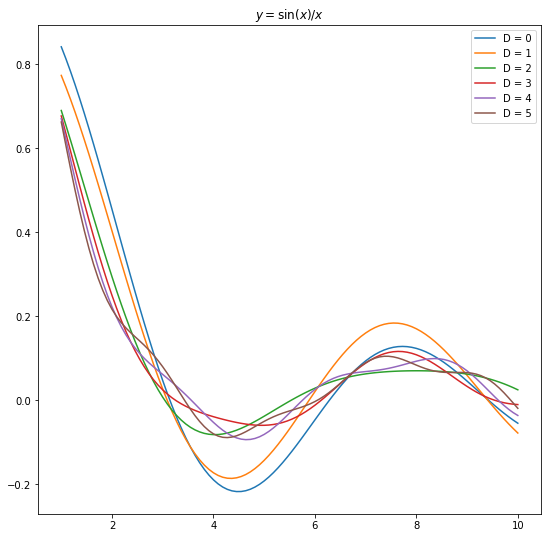

In [7]:
funcs = {lambda x: x : "$y=x$", lambda x: x ** 2 : "$y=x^2$", lambda x: np.sin(x) : "$y=\sin(x)$", 
         lambda x: np.sin(x ** 2) : "$y=\sin(x^2)$", lambda x: np.sin(x) / x : "$y=\sin(x) / x$"}
for f in funcs:
    # Выполним дискретизацию функции f с частотой 100
    X = np.linspace(1, 10, 100)
    Y = f(X)
    # Дозаполняем значение нулями до ближайшей степени двойки
    zeros = [0] * 28
    Y = np.concatenate((Y, np.array(zeros)), axis=0)
    fig = plt.figure(figsize=(9, 9))
    # Занулим последние D коэффициентов
    for D in range(6):
        zero_coeffs = [0] * D
        fft_coeffs = np.concatenate((fft(Y)[:128 - D], np.array(zero_coeffs)))
        plt.plot(X, ifft(fft_coeffs)[:100], label="D = {}".format(D))
    plt.title(funcs[f])
    plt.legend()
    plt.show()

По графикам функций можно увидеть, что при всех $D \leqslant 2$ разница между исходной функцией довольно значительна.

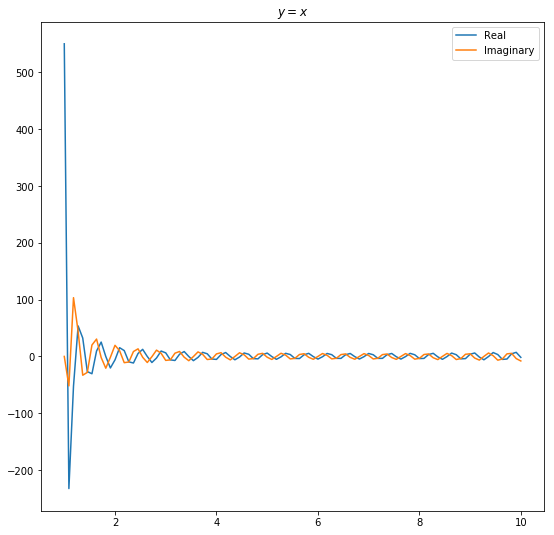

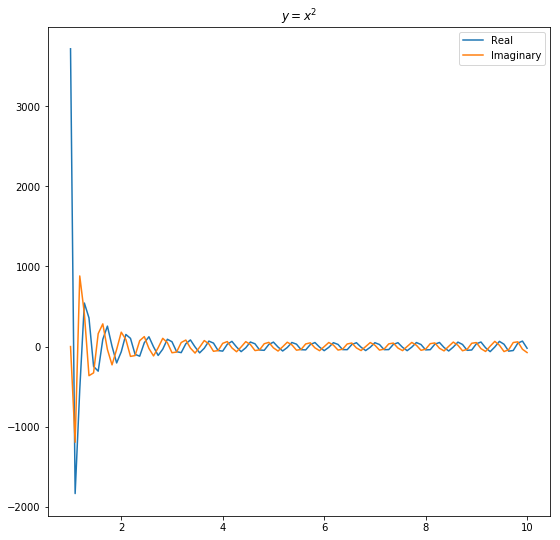

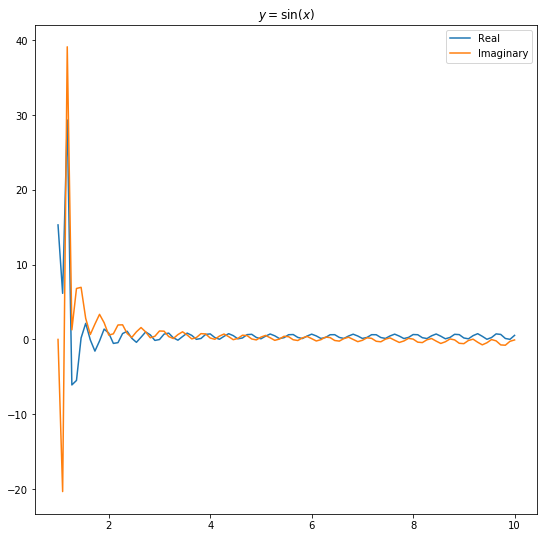

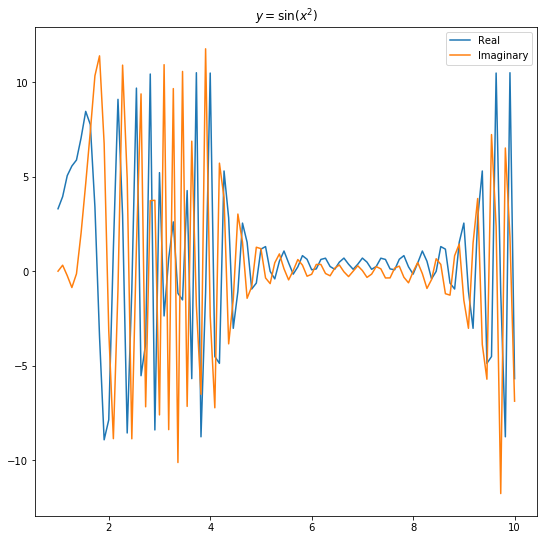

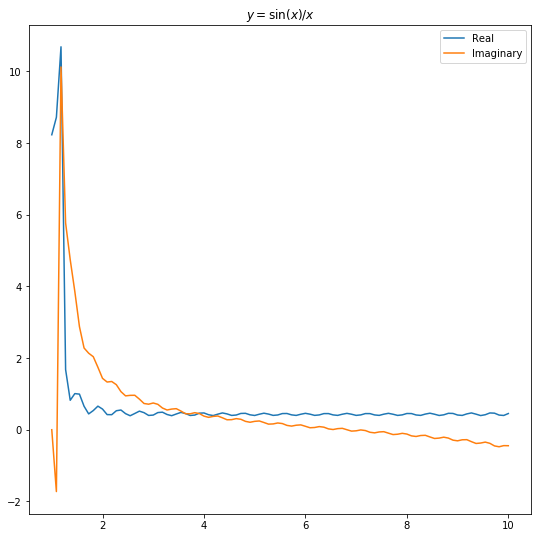

In [21]:
for f in funcs:
    # Выполним дискретизацию функции f с частотой 100
    X = np.linspace(1, 10, 100)
    Y = f(X)
    # Дозаполняем значение нулями до ближайшей степени двойки
    zeros = [0] * 28
    Y = np.concatenate((Y, np.array(zeros)), axis=0)
    fig = plt.figure(figsize=(9, 9))
    fft_coeffs = fft(Y)[:100]
    real_part = [x.real for x in fft_coeffs]
    imag_part = [x.imag for x in fft_coeffs]
    plt.plot(X, real_part, label="Real")
    plt.plot(X, imag_part, label="Imaginary")
    plt.title(funcs[f])
    plt.legend()
    plt.show()